In [1]:
import sys
import numpy as np
import cv2
import cv2.ml
from time import sleep
from datetime import datetime
import os
import numpy as np
from random import shuffle
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
from skimage.feature import hessian_matrix_det as Hessian
from skimage.feature import local_binary_pattern as LBP
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

p = os.path.join('../../','raw','CookIRCamET','Images','CookTests','MedRes')
p2 = os.path.join('../../','work','CookIRCamET','Images','CookTests','MedRes')
n_feat = 42
n_components_1 = 3#soil/res/can
n_components_2 = 2#shad/sun

In [2]:
def localSD(mat, n):    
    mat=np.float32(mat)
    mu = cv2.blur(mat,(n,n))
    mdiff=mu-mat
    mat2=cv2.blur(np.float64(mdiff*mdiff),(n,n))
    sd = np.float32(cv2.sqrt(mat2))
    
    return sd

In [3]:
def cornfusion(obs,pred,nclass):
    M = np.zeros((nclass,nclass))
    for i in range(obs.shape[0]):
        o = obs[i]
        p = pred[i]
        M[o,p] = M[o,p]+1
    return M

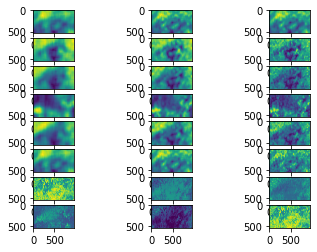

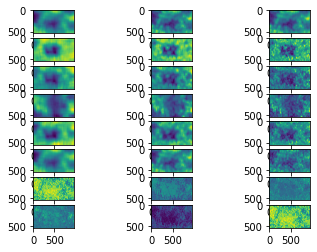

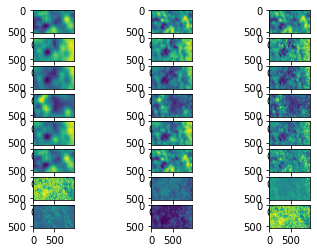

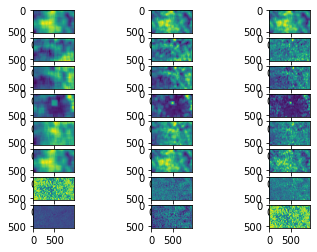

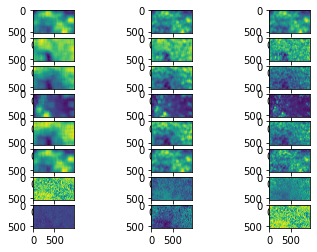

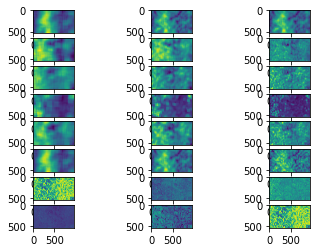

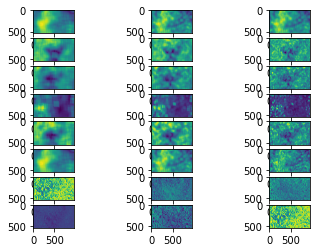

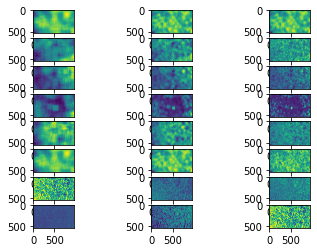

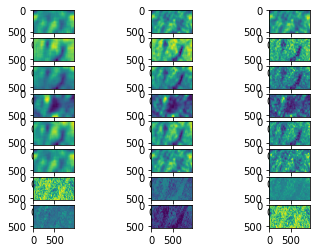

In [4]:
f_imgs=[]
test_imgs=[]
train_imgs=[]
n_img=0
fs=os.listdir(p)
shuffle(fs)
for f in fs:
    if 'bgr' in f:
        f_imgs = np.append(f_imgs,f)
        bgr = cv2.imread(os.path.join(p,f),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_src.tif'
        labels1 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_sun.tif'
        labels2 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
        l,a,bb = cv2.split(lab)
        h,s,v = cv2.split(hsv)
        
        sd_l1 = localSD(l, 127)
        sd_l2 = localSD(l, 63)
        sd_l3 = localSD(l, 31)
        
        lbp_l1 = LBP(l, 32, 4, method='ror')
        lbp_l2 = LBP(l, 24, 3, method='ror')
        lbp_l3 = LBP(l, 16, 2, method='ror')
        
        sd_a1 = localSD(a, 127)
        sd_a2 = localSD(a, 63)
        sd_a3 = localSD(a, 31)
        
        lbp_a1 = LBP(a, 32, 4, method='ror')
        lbp_a2 = LBP(a, 24, 3, method='ror')
        lbp_a3 = LBP(a, 16, 2, method='ror')
        
        sd_b1 = localSD(bb, 127)
        sd_b2 = localSD(bb, 63)
        sd_b3 = localSD(bb, 31)
        
        lbp_b1 = LBP(bb, 32, 4, method='ror')
        lbp_b2 = LBP(bb, 24, 3, method='ror')
        lbp_b3 = LBP(bb, 16, 2, method='ror')
        
        sd_h1 = localSD(h, 127)
        sd_h2 = localSD(h, 63)
        sd_h3 = localSD(h, 31)
        
        lbp_h1 = LBP(h, 32, 4, method='ror')
        lbp_h2 = LBP(h, 24, 3, method='ror')
        lbp_h3 = LBP(h, 16, 2, method='ror')
        
        sd_s1 = localSD(s, 127)
        sd_s2 = localSD(s, 63)
        sd_s3 = localSD(s, 31)
        
        lbp_s1 = LBP(s, 32, 4, method='ror')
        lbp_s2 = LBP(s, 24, 3, method='ror')
        lbp_s3 = LBP(s, 16, 2, method='ror')
        
        sd_v1 = localSD(v, 127)
        sd_v2 = localSD(v, 63)
        sd_v3 = localSD(v, 31)
        
        lbp_v1 = LBP(v, 32, 4, method='ror')
        lbp_v2 = LBP(v, 24, 3, method='ror')
        lbp_v3 = LBP(v, 16, 2, method='ror')
        
        plt.subplot(831)
        plt.imshow(sd_l1)
        plt.subplot(832)
        plt.imshow(sd_l2)
        plt.subplot(833)
        plt.imshow(sd_l2)
        plt.subplot(834)
        plt.imshow(sd_a1)
        plt.subplot(835)
        plt.imshow(sd_a2)
        plt.subplot(836)
        plt.imshow(sd_a3)
        plt.subplot(837)
        plt.imshow(sd_b1)
        plt.subplot(838)
        plt.imshow(sd_b2)
        plt.subplot(839)
        plt.imshow(sd_b3)
        plt.subplot(8,3,10)
        plt.imshow(sd_h1)
        plt.subplot(8,3,11)
        plt.imshow(sd_h2)
        plt.subplot(8,3,12)
        plt.imshow(sd_h3)
        plt.subplot(8,3,13)
        plt.imshow(sd_s1)
        plt.subplot(8,3,14)
        plt.imshow(sd_s2)
        plt.subplot(8,3,15)
        plt.imshow(sd_s3)
        plt.subplot(8,3,16)
        plt.imshow(sd_v1)
        plt.subplot(8,3,17)
        plt.imshow(sd_v2)
        plt.subplot(8,3,18)
        plt.imshow(sd_v3)
        plt.subplot(8,3,19)
        plt.imshow(l)
        plt.subplot(8,3,20)
        plt.imshow(a)
        plt.subplot(8,3,21)
        plt.imshow(bb)
        plt.subplot(8,3,22)
        plt.imshow(h)
        plt.subplot(8,3,23)
        plt.imshow(s)
        plt.subplot(8,3,24)
        plt.imshow(v)
        plt.show()
        img_size = l.shape
        bb = bb.ravel()
        a = a.ravel()
        l = l.ravel()
        h = h.ravel()
        s = s.ravel()
        v = v.ravel()
        sd_l1 = sd_l1.ravel()
        sd_l2 = sd_l2.ravel()
        sd_l3 = sd_l3.ravel()
        lbp_l1 = lbp_l1.ravel()
        lbp_l2 = lbp_l2.ravel()
        lbp_l3 = lbp_l3.ravel()
        sd_a1 = sd_a1.ravel()
        sd_a2 = sd_a2.ravel()
        sd_a3 = sd_a3.ravel()
        lbp_a1 = lbp_a1.ravel()
        lbp_a2 = lbp_a2.ravel()
        lbp_a3 = lbp_a3.ravel()
        sd_b1 = sd_b1.ravel()
        sd_b2 = sd_b2.ravel()
        sd_b3 = sd_b3.ravel()
        lbp_b1 = lbp_b1.ravel()
        lbp_b2 = lbp_b2.ravel()
        lbp_b3 = lbp_b3.ravel()
        sd_h1 = sd_h1.ravel()
        sd_h2 = sd_h2.ravel()
        sd_h3 = sd_h3.ravel()
        lbp_h1 = lbp_h1.ravel()
        lbp_h2 = lbp_h2.ravel()
        lbp_h3 = lbp_a3.ravel()
        sd_s1 = sd_s1.ravel()
        sd_s2 = sd_s2.ravel()
        sd_s3 = sd_s3.ravel()
        lbp_s1 = lbp_s1.ravel()
        lbp_s2 = lbp_s2.ravel()
        lbp_s3 = lbp_s3.ravel()
        sd_v1 = sd_v1.ravel()
        sd_v2 = sd_v2.ravel()
        sd_v3 = sd_v3.ravel()
        lbp_v1 = lbp_v1.ravel()
        lbp_v2 = lbp_v2.ravel()
        lbp_v3 = lbp_v3.ravel()
        feat = np.vstack((l.T,a.T,bb.T,h.T,s.T,v.T,sd_l1.T,sd_l2.T,sd_l3.T,lbp_l1.T,lbp_l2.T,lbp_l3.T,sd_a1.T,sd_a2.T,sd_a3.T,lbp_a1.T,lbp_a2.T,lbp_a3.T,sd_b1.T,sd_b2.T,sd_b3.T,lbp_b1.T,lbp_b2.T,lbp_b3.T,sd_h1.T,sd_h2.T,sd_h3.T,lbp_h1.T,lbp_h2.T,lbp_h3.T,sd_s1.T,sd_s2.T,sd_s3.T,lbp_s1.T,lbp_s2.T,lbp_s3.T,sd_v1.T,sd_v2.T,sd_v3.T,lbp_v1.T,lbp_v2.T,lbp_v3.T)).T
        #labels = np.sum(np.vstack((soil.ravel().T, residue.ravel().T*2, shadow.ravel().T*3, vegetation.ravel().T*4)).T,axis=1)
        labels1 = labels1.ravel()
        labels2 = labels2.ravel()                
        if n_img<7:
            train_imgs.append({'bgr':bgr,'feats':feat,'labels1':labels1,'labels2':labels2})
        else:
            test_imgs.append({'bgr':bgr,'feats':feat,'labels1':labels1,'labels2':labels2})
        n_img=n_img+1

In [5]:
train_feats = []
train_labels1 = []
train_labels2 = []
for sample in train_imgs:
    train_feats.append(sample['feats'])
    train_labels1.append(sample['labels1'])
    train_labels2.append(sample['labels2'])

In [6]:
test_feats = []
test_labels1 = []
test_labels2 = []
for sample in test_imgs:
    test_feats.append(sample['feats'])
    test_labels1.append(sample['labels1'])
    test_labels2.append(sample['labels2'])

In [7]:
train_feats = np.array(train_feats).reshape((-1,n_feat)).astype(np.float32)
train_labels1 = np.array(train_labels1).reshape((-1,1)).astype(np.int32).ravel()
train_labels2 = np.array(train_labels2).reshape((-1,1)).astype(np.int32).ravel()
test_feats = np.array(test_feats).reshape((-1,n_feat)).astype(np.float32)
test_labels1 = np.array(test_labels1).reshape((-1,1)).astype(np.int32).ravel()
test_labels2 = np.array(test_labels2).reshape((-1,1)).astype(np.int32).ravel()

In [8]:
scaler = StandardScaler()
train_feats0 = scaler.fit_transform(train_feats)
test_feats0 = scaler.fit_transform(test_feats)

In [ ]:
#need feature selection her
svc1 = svm.SVC()
clf_svc1 = RFECV(svc1,step=1, cv=5,n_jobs=-1)
clf_svc1.fit(train_feats, train_labels1)
r1 = clf_svc1.ranking_
mask1 = r1==1
train_feats = train_feats0[:,mask1]
test_feats = test_feats0[:,mask1]

In [ ]:
parameters = {'C':np.logspace(-3,3,7), 'gamma':np.logspace(-4,0,5),'decision_function_shape':('ovo', 'ovr')}
svc1 = svm.SVC()
clf_svc1 = GridSearchCV(svc1, parameters,n_jobs=-1,cv=5)
clf_svc1.fit(train_feats, train_labels1)
clf_svc1.best_params_
model_svc1 = clf_svc1.best_estimator_
test_feats = scaler.transform(test_feats)
pred_svc1 = model_svc1.predict(test_feats)

In [ ]:
M_svc1 = cornfusion(test_labels1,pred_svc1,n_components1)
M_svc1 = M_svc1/np.sum(M_svc1,axis=1).reshape((-1,1))

In [ ]:
#need feature selection her
svc2 = svm.SVC()
clf_svc2 = RFECV(svc2,step=1, cv=5,n_jobs=-1)
clf_svc2.fit(train_feats, train_labels2)
clf_svc2.ranking_
r2 = clf_svc2.ranking_
mask2 = r2==1
train_feats = train_feats0[:,mask2]
test_feats = test_feats0[:,mask2]

In [ ]:
parameters = {'C':np.logspace(-3,3,7), 'gamma':np.logspace(-4,0,5),'decision_function_shape':('ovo', 'ovr')}
svcd = svm.SVC()
clf_svc2 = GridSearchCV(svc2, parameters,n_jobs=-1,cv=5)
clf_svc2.fit(train_feats, train_labels2)
clf_svc2.best_params_
model_svc2 = clf_svc2.best_estimator_
test_feats = scaler.transform(test_feats)
pred_svc2 = model_svc2.predict(test_feats)

In [ ]:
M_svc2 = cornfusion(test_labels2,pred_svc2,n_components2)
M_svc2 = M_svc2/np.sum(M_svc2,axis=1).reshape((-1,1))

In [ ]:
M_svc1_df = {}
M_svc1_df['shade'] = M_svc1[:,0]
M_svc1_df['sun'] = M_svc1[:,1]
M_svc1_df = DataFrame(M_svc1_df)
M_svc1_df.to_csv(os.path.join(p2,'M1.csv'))

M_svc2_df = {}
M_svc2_df['soil'] = M_svc2[:,0]
M_svc2_df['res'] = M_svc2[:,1]
M_svc2_df['can'] = M_svc2[:,1]
M_svc2_df = DataFrame(M_svc2_df)
M_svc2_df.to_csv(os.path.join(p2,'M2.csv'))

r_df = {}
r_df['svc1'] = r1
r_df['svc2'] = r2
r_df = DataFrame(r_df)
r_df.to_csv(os.path.join(p2,'ranking.csv'))

p1_df = DataFrame(clf_svc1.best_params_)
p1_df.to_csv(os.path.join(p2,'params1.csv'))

p2_df = DataFrame(clf_svc2.best_params_)
p2_df.to_csv(os.path.join(p2,'params2.csv'))